# Augmentacija govornih podataka za poboljšanje performansi sistema za automatsko prepoznavanje govora

## Importovanje biblioteka

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from audiomentations import AddBackgroundNoise
import numpy as np
import IPython.display as ipd


## Ucitacanje skupa podataka
Link https://www.kaggle.com/competitions/tensorflow-speech-recognition-challenge/data?select=train.7z

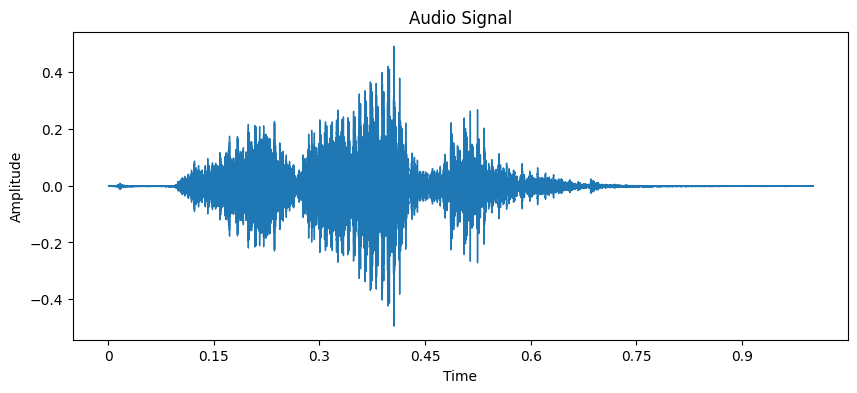

In [2]:
audio_path = 'train/audio/seven/0b77ee66_nohash_0.wav'
signal, sr = librosa.load(audio_path, sr=None)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title('Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## Zvuk

In [3]:
ipd.Audio(data=signal, rate=sr)

## Primena tehnika augmentacije

In [4]:
def play_audio_comparison(original_signal, modified_signal, text):
    print("Originalni audio:")
    display(ipd.Audio(original_signal, rate=sr))  
    print(f"{text}:")
    display(ipd.Audio(modified_signal, rate=sr))  

def plot_waveforms(original_signal, augmented_signal, sr, text):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.title('Originalni audio')
    librosa.display.waveshow(original_signal, sr=sr)
    plt.xlabel('Vreme')
    plt.ylabel('Amplituda')

    plt.subplot(2, 1, 2)
    plt.title(text)
    librosa.display.waveshow(augmented_signal, sr=sr)
    plt.xlabel('Vreme')
    plt.ylabel('Amplituda')

    plt.tight_layout()
    plt.show()

def plot_spectrograms(original_signal, augmented_signal, sr, text):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.title('Spektogram')
    X = librosa.stft(original_signal)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(2, 1, 2)
    plt.title(text)
    X_aug = librosa.stft(augmented_signal)
    Xdb_aug = librosa.amplitude_to_db(abs(X_aug))
    librosa.display.specshow(Xdb_aug, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

### Dodavanje pozdinskog suma

In [5]:
def add_background_noise(signal, noise_factor):
    noise = np.random.randn(len(signal))
    
    augmented_signal = signal + noise_factor * noise
    
    augmented_signal = np.clip(augmented_signal, -1.0, 1.0)
    
    return augmented_signal

noisy_signal = add_background_noise(signal, noise_factor=0.01)

play_audio_comparison(signal, noisy_signal, "Audio sa pozadinskim sumom:" )


Originalni audio:


Audio sa pozadinskim sumom::


#### Prikaz talasnih formi originalnog i modifikovanog zvuka

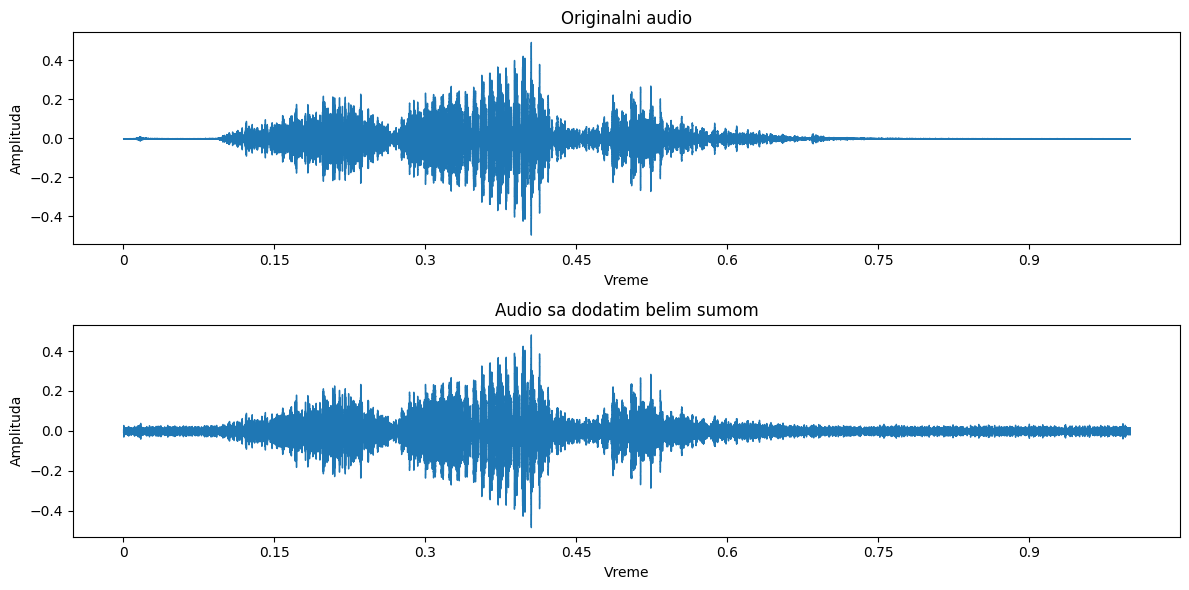

In [6]:

plot_waveforms(signal, noisy_signal, sr, 'Audio sa dodatim belim sumom') 


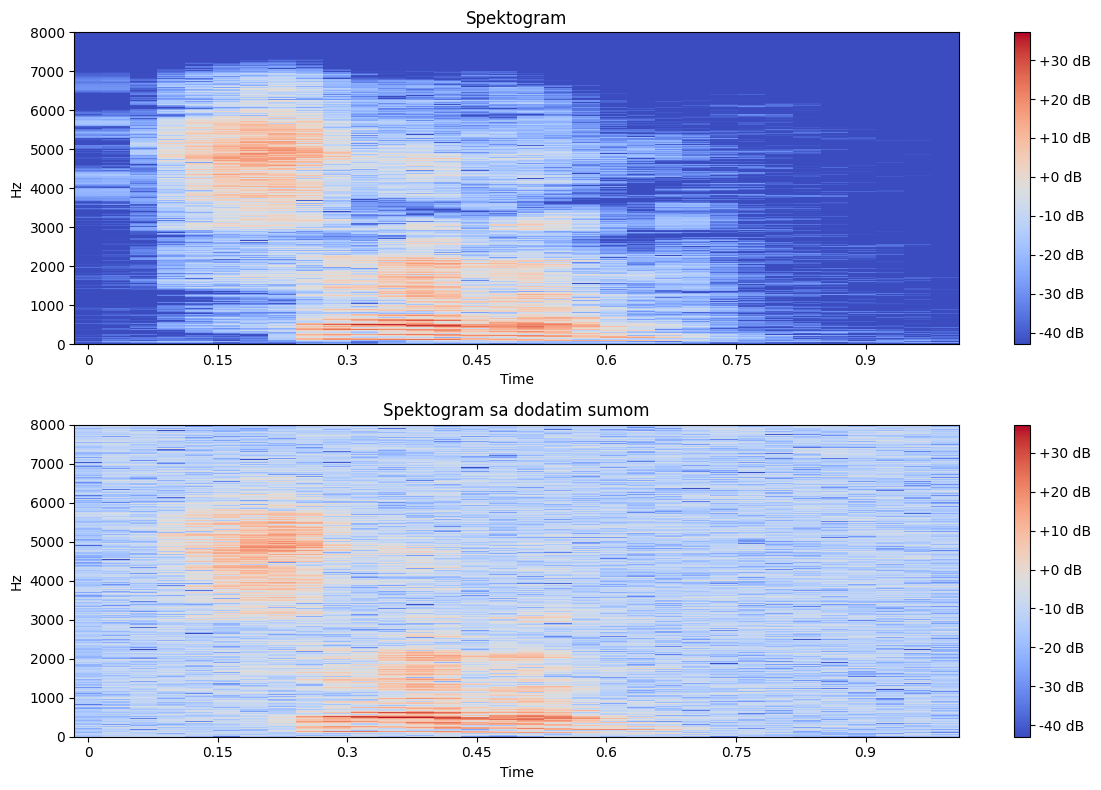

In [7]:
plot_spectrograms(signal, noisy_signal, sr, 'Spektogram sa dodatim sumom')  

### Promena Brzine Govora (Time Stretching)

In [8]:
time_stretched_signal = librosa.effects.time_stretch(signal, rate=1.5)

print("Originalni audio:")
ipd.display(ipd.Audio(data=signal, rate=sr))

print("Audio sa promenjenom brzinom (usporeno):")
ipd.display(ipd.Audio(data=time_stretched_signal, rate=sr))

Originalni audio:


Audio sa promenjenom brzinom (usporeno):


#### Prikaz talasnih formi originalnog i modifikovanog zvuka

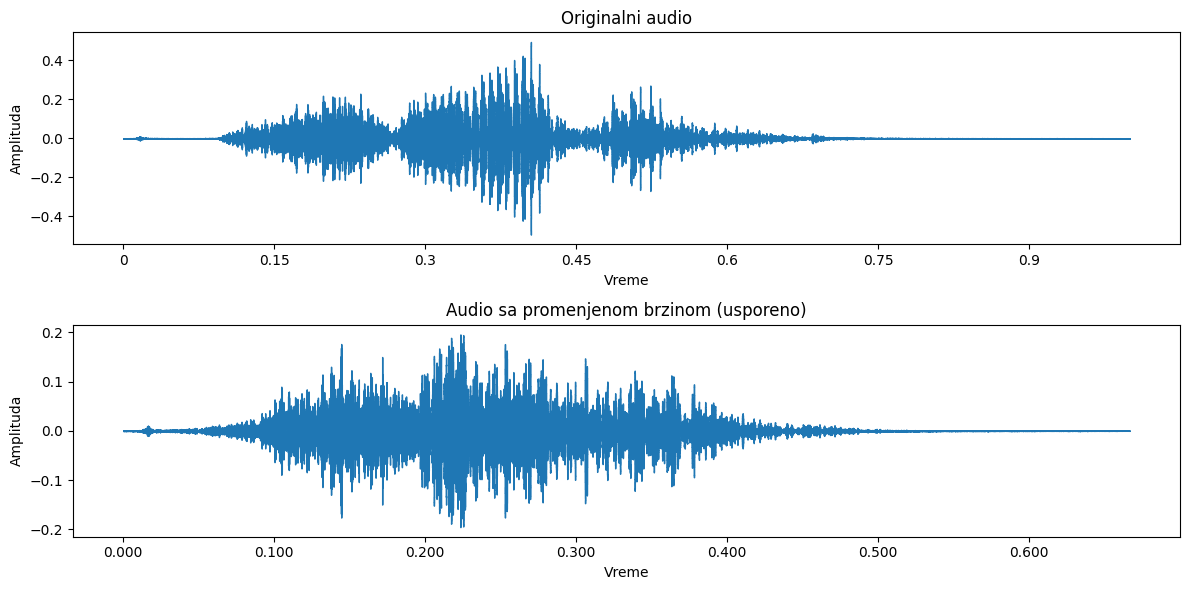

In [9]:
plot_waveforms(signal, time_stretched_signal, sr, 'Audio sa promenjenom brzinom (usporeno)')  

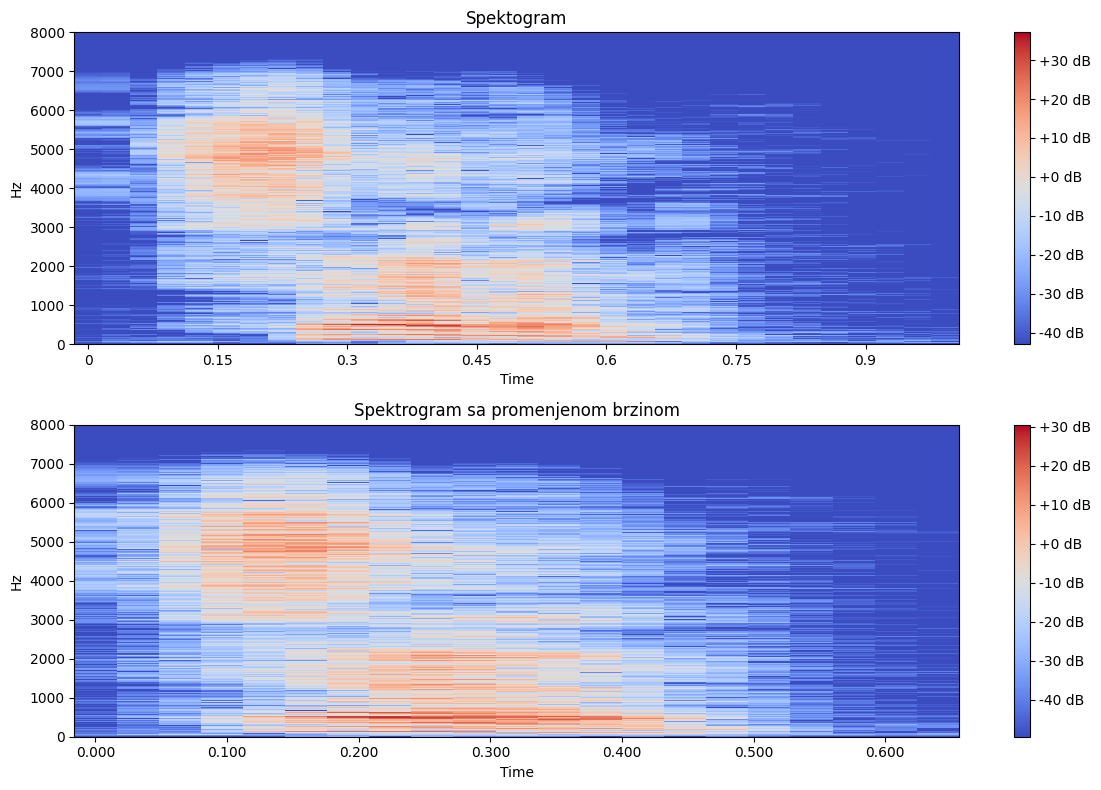

In [10]:
plot_spectrograms(signal, time_stretched_signal, sr, 'Spektrogram sa promenjenom brzinom') 

### Promena visine tona(Pitch Shifting)

In [11]:
def apply_pitch_shift(signal, sr, n_steps):
    pitch_shifted_signal = librosa.effects.pitch_shift(signal, sr=sr, n_steps=n_steps)
    return pitch_shifted_signal

pitch_shifted_signal = apply_pitch_shift(signal, sr, 8)

play_audio_comparison(signal, pitch_shifted_signal, "Audio sa promenjenom visinom tona")

Originalni audio:


Audio sa promenjenom visinom tona:


#### Prikaz talasnih formi originalnog i modifikovanog zvuka

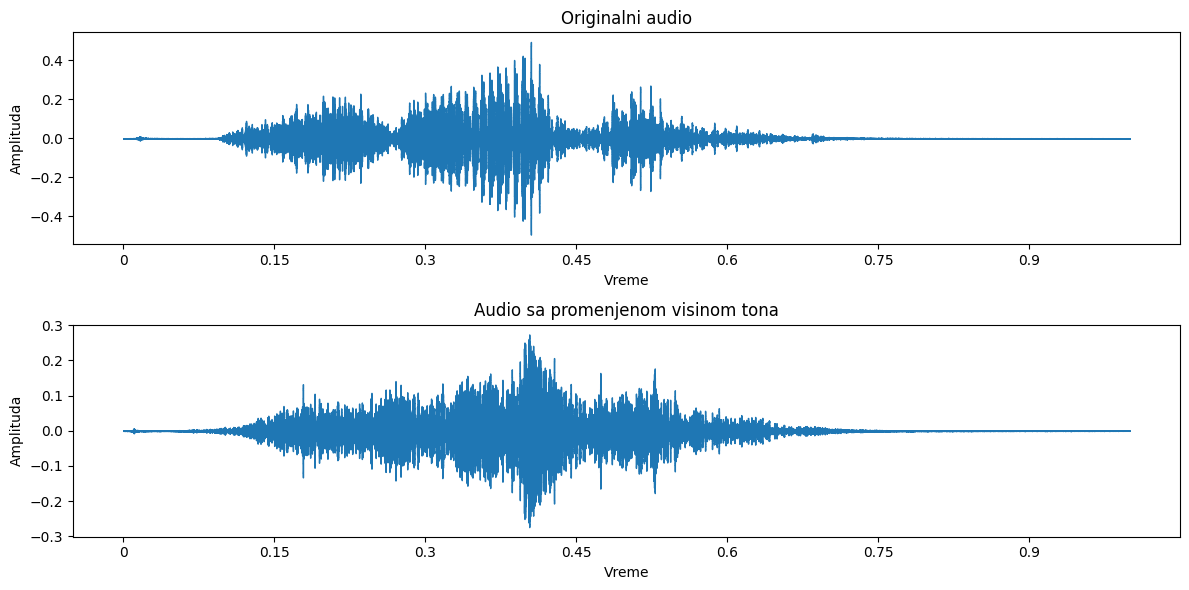

In [12]:
plot_waveforms(signal, pitch_shifted_signal, sr, 'Audio sa promenjenom visinom tona') 

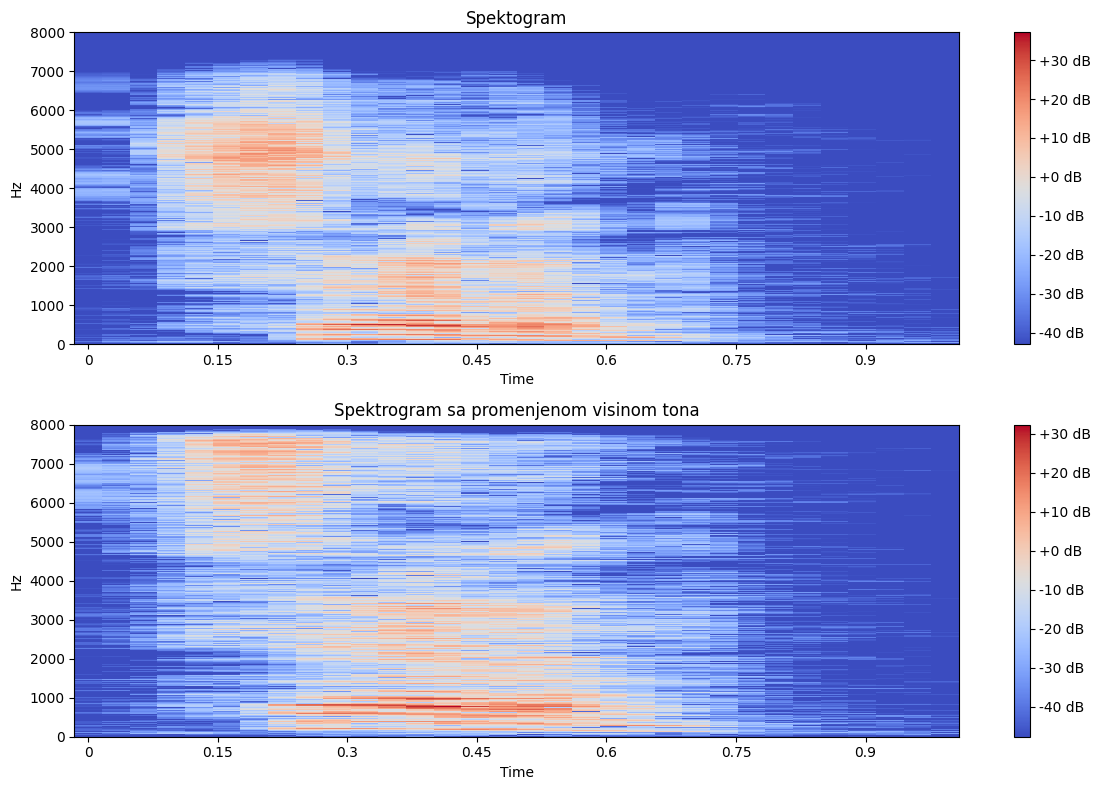

In [13]:
plot_spectrograms(signal, pitch_shifted_signal, sr, 'Spektrogram sa promenjenom visinom tona')  

### Dodvanje eha

In [14]:
def add_echo(signal, sr, delay_seconds, decay):

    delay_samples = int(delay_seconds * sr)
    
    echo_signal = np.copy(signal)
    echo_signal[delay_samples:] += decay * signal[:-delay_samples]
    
    return echo_signal

echo_signal = add_echo(signal, sr, 0.3, 0.5)

play_audio_comparison(signal, echo_signal, "Audio sa ehom")



Originalni audio:


Audio sa ehom:


#### Prikaz talasnih formi originalnog i modifikovanog zvuka

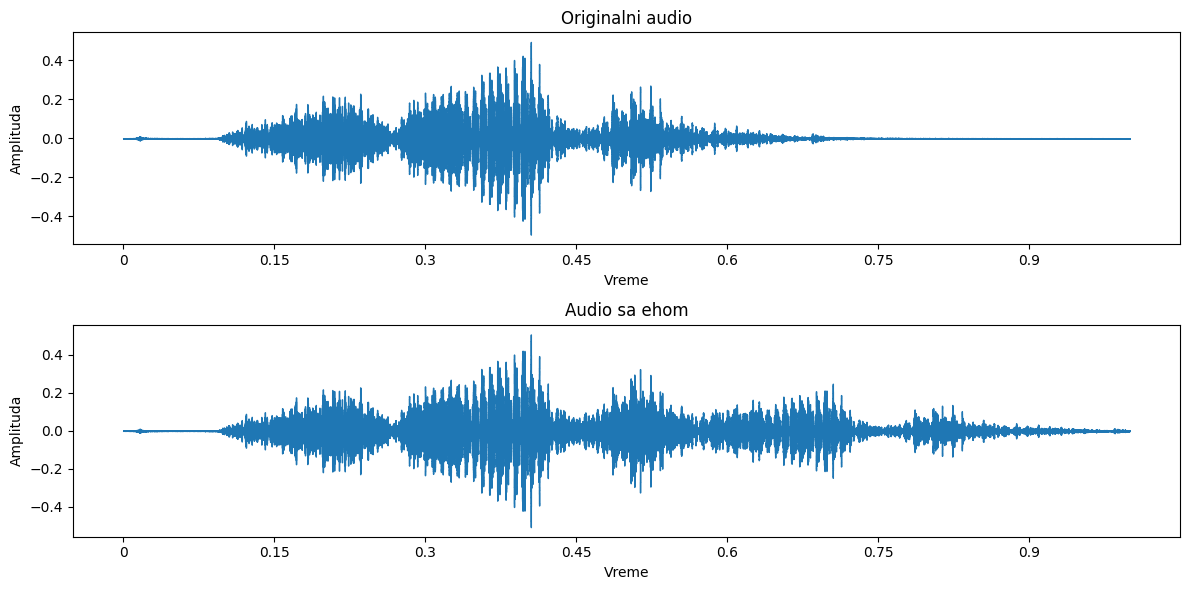

In [15]:
plot_waveforms(signal, echo_signal, sr, "Audio sa ehom") 

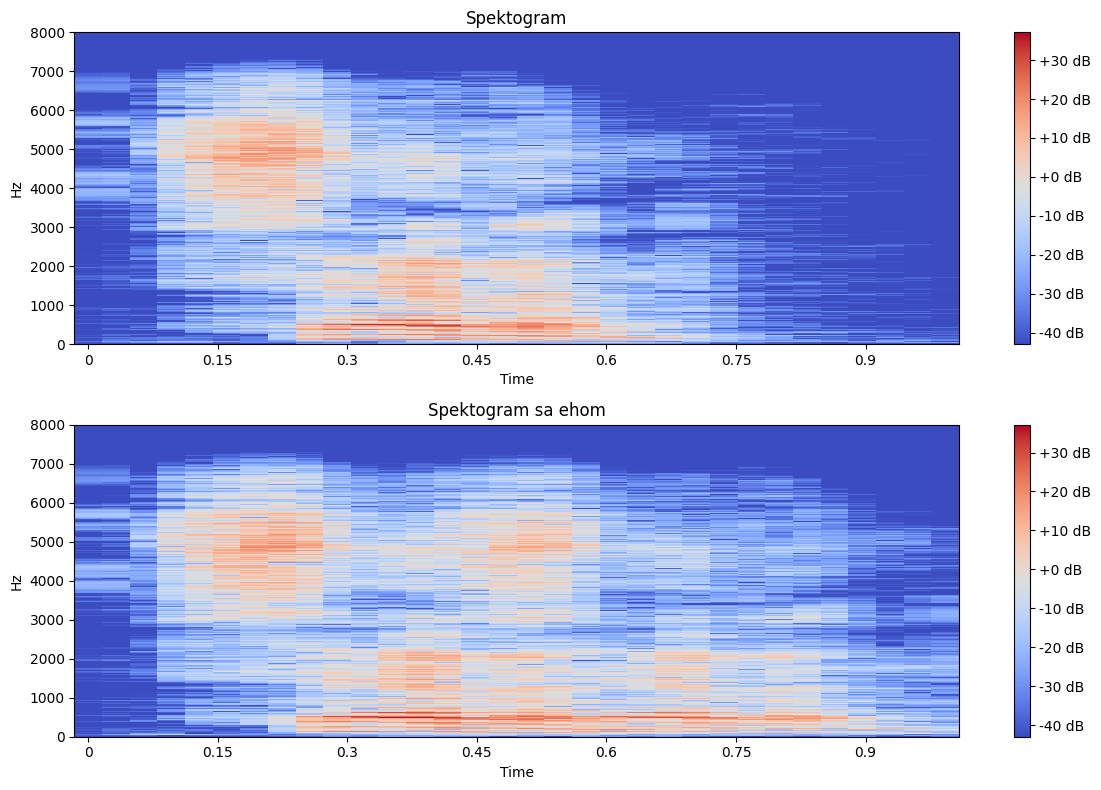

In [16]:
plot_spectrograms(signal, echo_signal, sr, "Spektogram sa ehom") 

### Maskiranje vremena(Time Masking)

In [17]:
def time_mask(signal, sr, max_mask_size):
    
    max_mask_size_samples = int(max_mask_size * sr)
    
    mask_start = np.random.randint(0, len(signal) - max_mask_size_samples)
    mask_end = mask_start + max_mask_size_samples
    
    masked_signal = np.copy(signal)
    masked_signal[mask_start:mask_end] = 0
    
    return masked_signal

time_masked_signal = time_mask(signal, sr, 0.5)

play_audio_comparison(signal, time_masked_signal, "Audio sa Time Masking-om")


Originalni audio:


Audio sa Time Masking-om:


#### Prikaz talasnih formi originalnog i modifikovanog zvuka

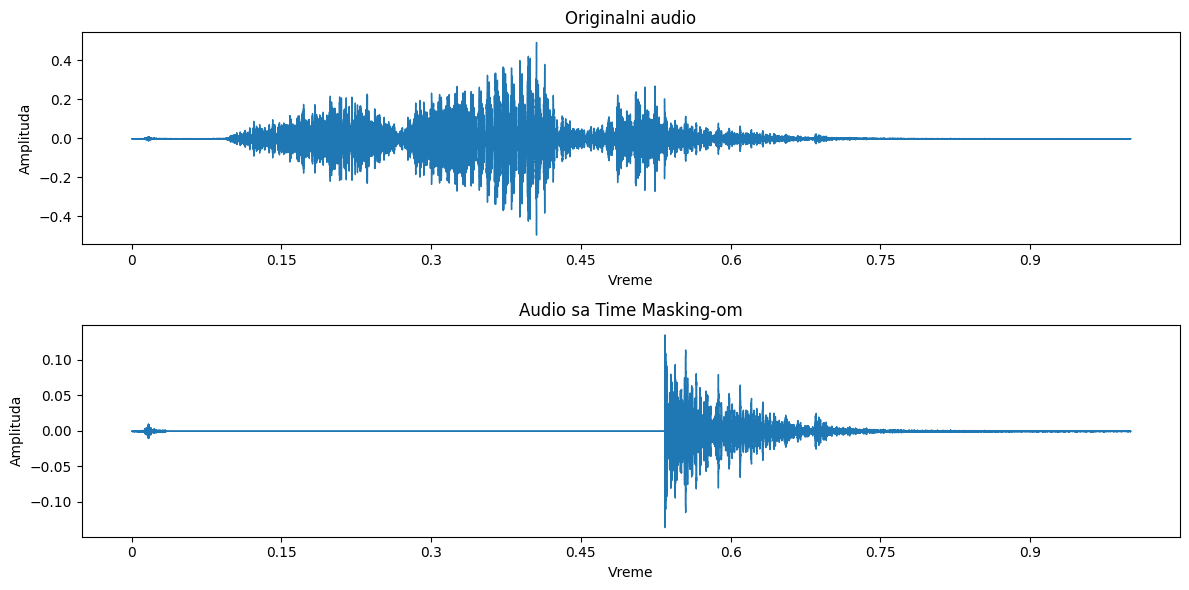

In [18]:
plot_waveforms(signal, time_masked_signal, sr, "Audio sa Time Masking-om")  

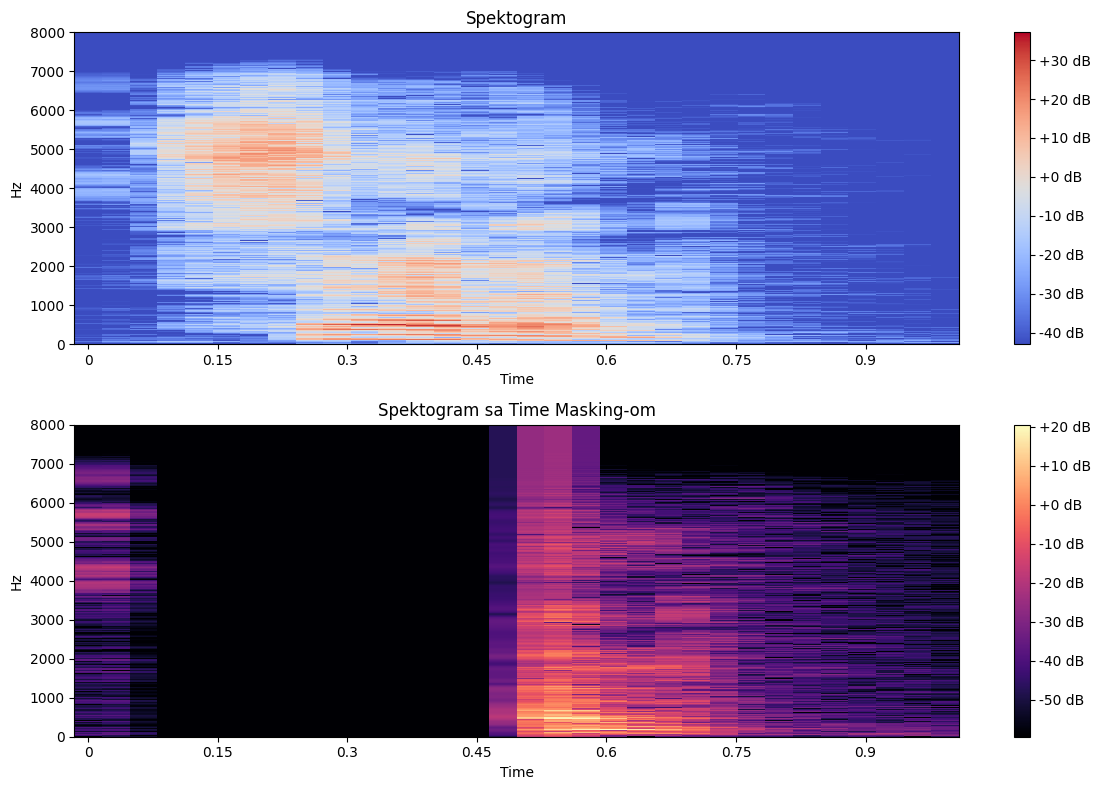

In [19]:
plot_spectrograms(signal, time_masked_signal, sr, "Spektogram sa Time Masking-om")

### Maskiranje ucestanosti(Frequency Masking)

In [20]:
def frequency_mask(signal, max_mask_freq):
    S = librosa.stft(signal)
    magnitude, phase = librosa.magphase(S)
    
    mask_size = int(max_mask_freq * magnitude.shape[0])
    mask_start = np.random.randint(0, magnitude.shape[0] - mask_size)
    mask_end = mask_start + mask_size

    masked_magnitude = np.copy(magnitude)
    masked_magnitude[mask_start:mask_end, :] = 0

    masked_S = masked_magnitude * phase
    masked_signal = librosa.istft(masked_S)
    
    return masked_signal

frequency_masked_signal = frequency_mask(signal, 0.2)

play_audio_comparison(signal, frequency_masked_signal, "Audio sa Frequency Masking-om")

Originalni audio:


Audio sa Frequency Masking-om:


#### Prikaz talasnih formi originalnog i modifikovanog zvuka

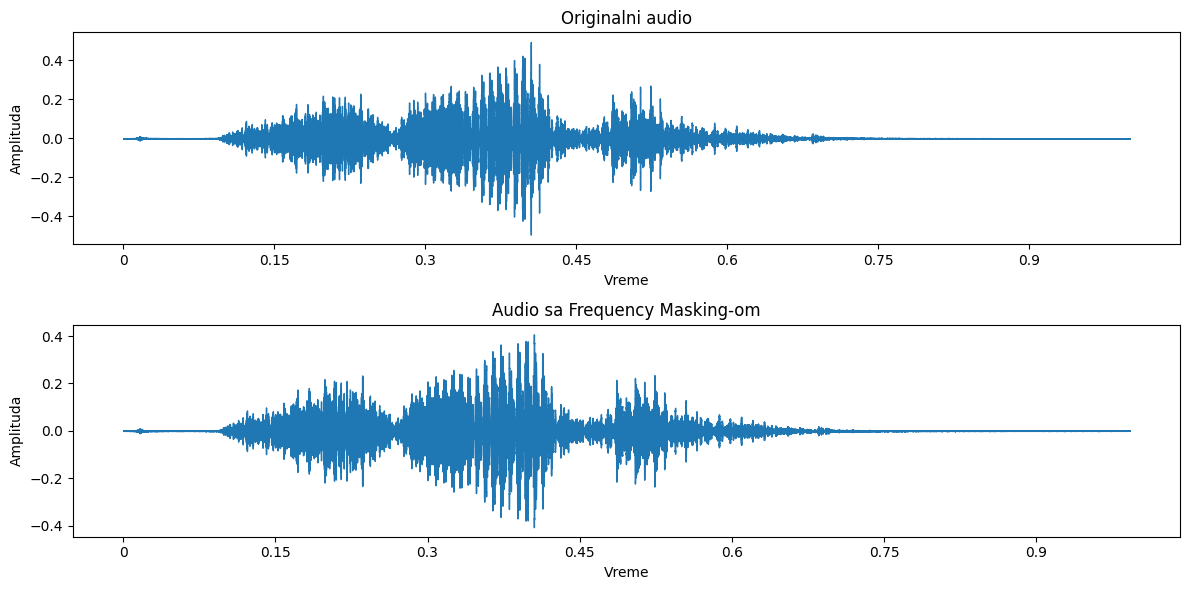

In [21]:
plot_waveforms(signal, frequency_masked_signal, sr, "Audio sa Frequency Masking-om") 

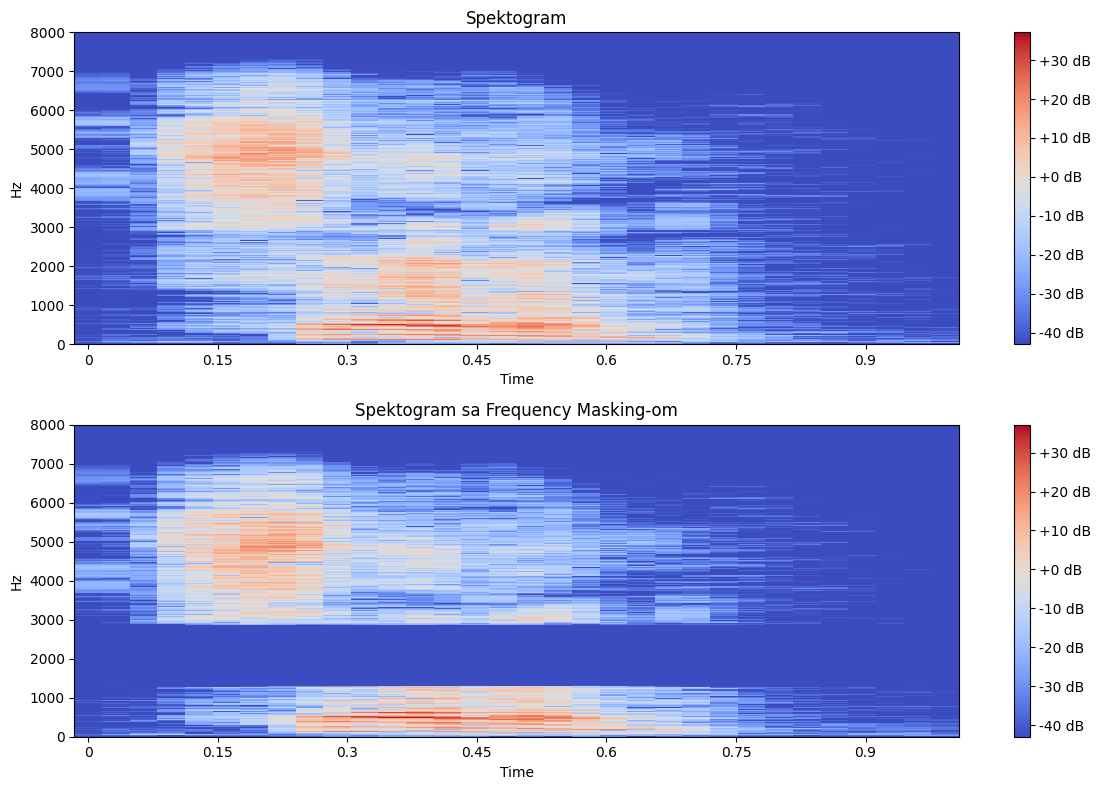

In [22]:
plot_spectrograms(signal, frequency_masked_signal, sr, "Spektogram sa Frequency Masking-om")

### Skaliranje amplitude (Amplitude Scaling)

In [23]:
def amplitude_scaling(signal, scale_factor):
    
    scaled_signal = signal * scale_factor
    return scaled_signal


scaled_signal = amplitude_scaling(signal, 2.5)

play_audio_comparison(signal, scaled_signal, "Audio sa Skaliranjem amplitude")

Originalni audio:


Audio sa Skaliranjem amplitude:


#### Prikaz talasnih formi originalnog i modifikovanog zvuka

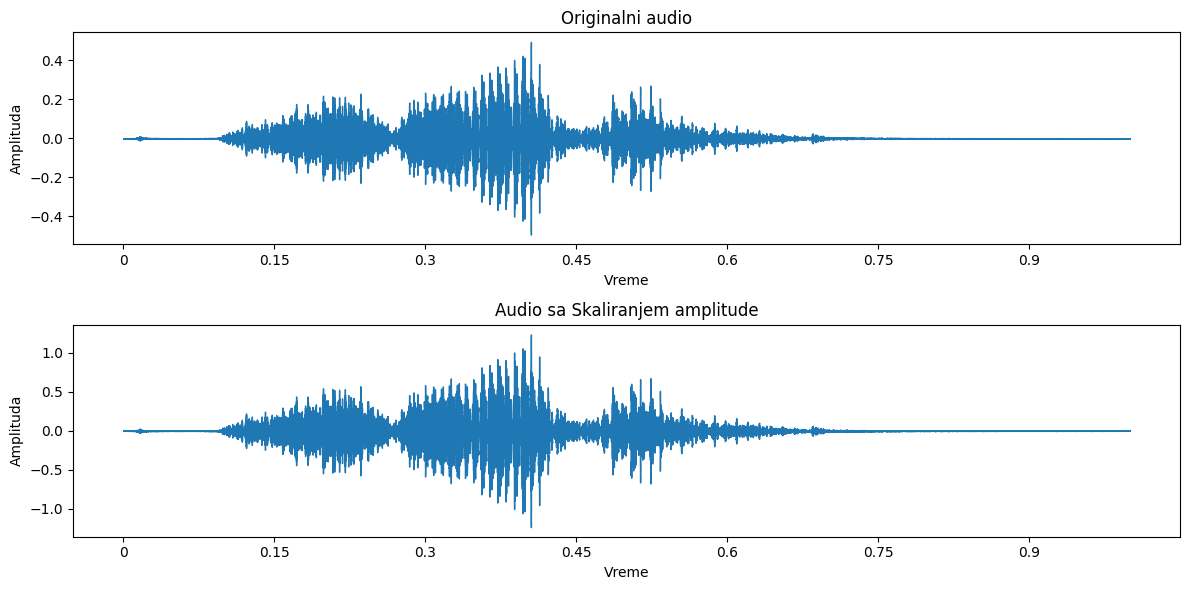

In [24]:
plot_waveforms(signal, scaled_signal, sr, "Audio sa Skaliranjem amplitude")  

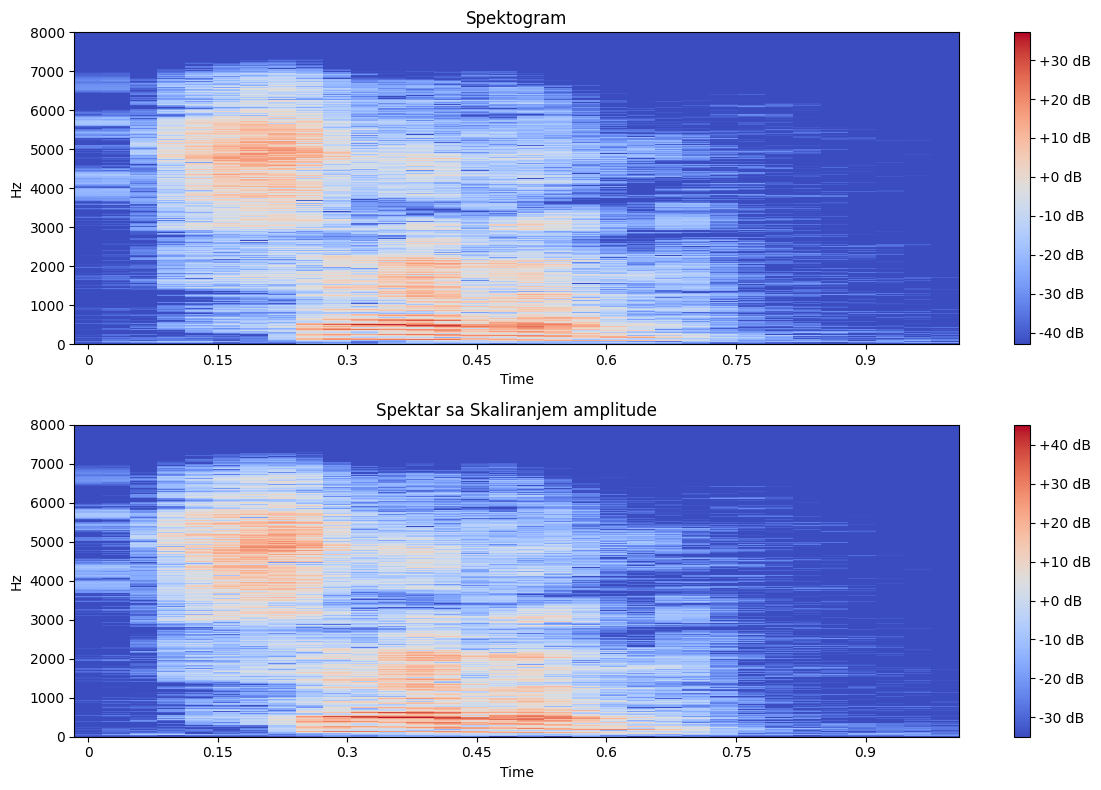

In [25]:
plot_spectrograms(signal, scaled_signal, sr, "Spektar sa Skaliranjem amplitude")

## Kombinovanje tehnika

In [26]:
def apply_augmentation(signal, sr):
    signal_with_noise = add_background_noise(signal, noise_factor=0.01)

    scaled_signal = amplitude_scaling(signal_with_noise, scale_factor=1.2)

    augmented_signal = time_mask(scaled_signal, sr, max_mask_size=0.3)
    
    return augmented_signal

augmented_signal = apply_augmentation(signal, sr)

play_audio_comparison(signal, augmented_signal, "Obradjeni audio")

Originalni audio:


Obradjeni audio:


### Prikaz talasnih formi originalnog i modifikovanog zvuka

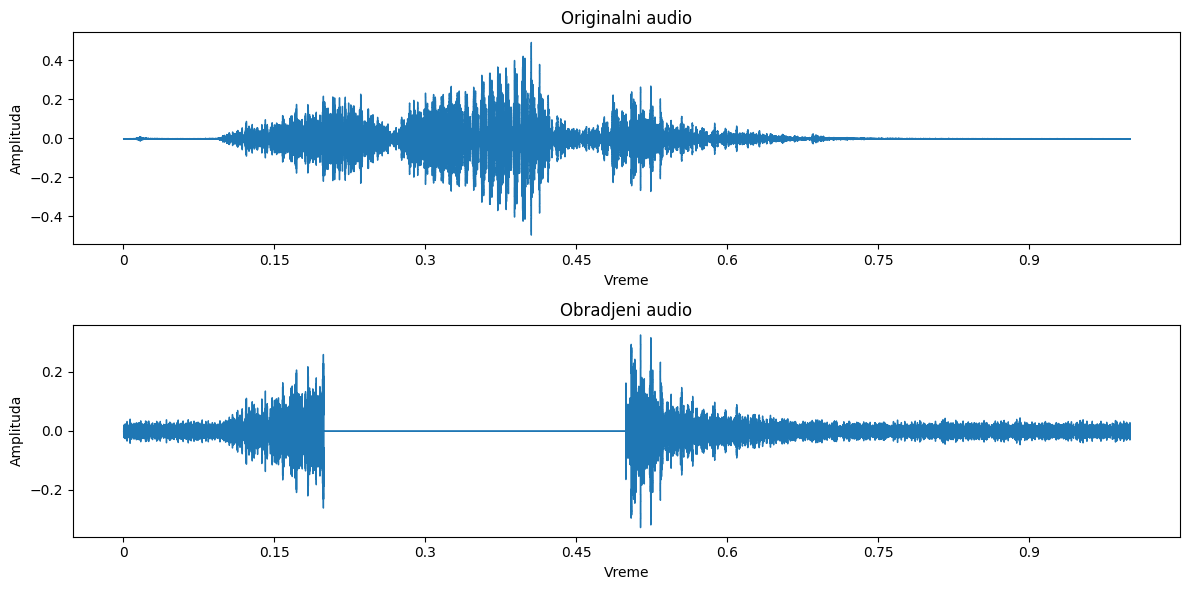

In [27]:
plot_waveforms(signal, augmented_signal, sr, "Obradjeni audio") 

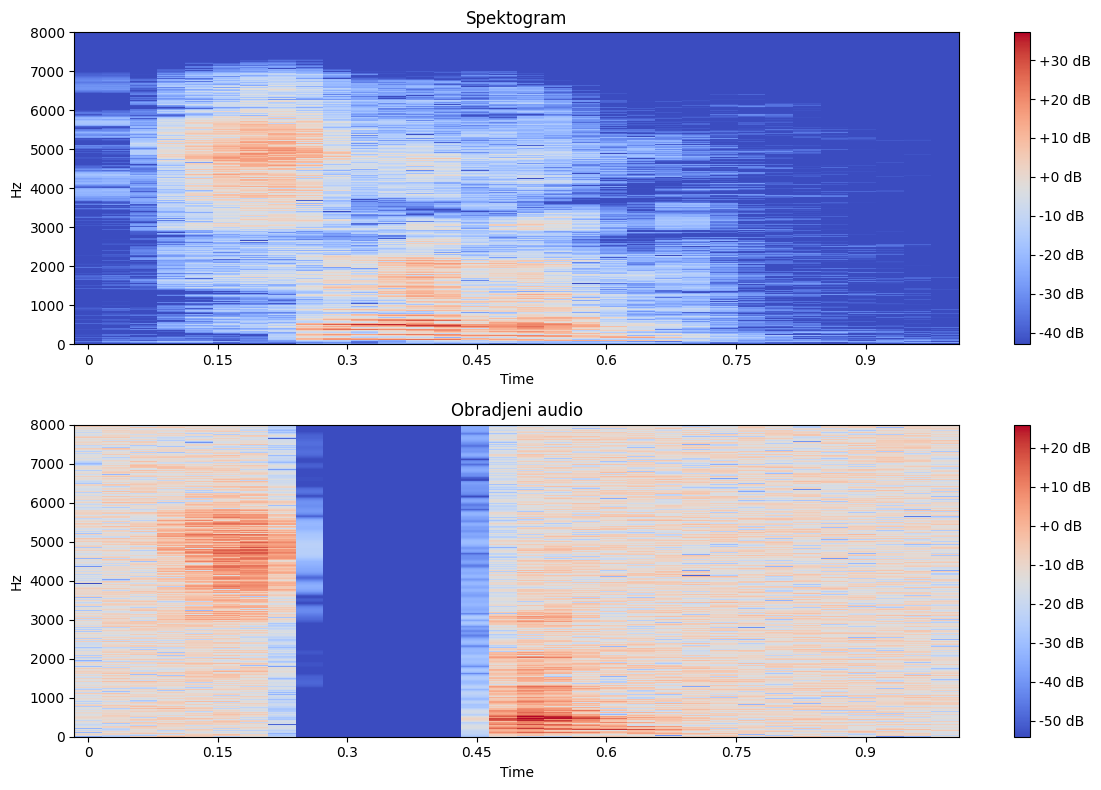

In [28]:
plot_spectrograms(signal, augmented_signal, sr, "Obradjeni audio")